## Observations and Insights 

Based on the bar graph and data used for the total amount of measurements, Capomulin and Ramicane were administered the most.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

mouse_metadata_df

# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
combined_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"])
number_mice

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["Mouse ID"].value_counts()

g989    13
m957    10
t565    10
r811    10
s710    10
        ..
u153     1
h428     1
o848     1
d133     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=["Mouse ID"], keep="last")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = len(clean_df["Mouse ID"])
clean_number_mice

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Creating new varaible to hold data that is now grouped by Drug Regimen
regimen_summary = clean_df.groupby(["Drug Regimen"])

# Individal variables using fucntions to find the mean, median, variance, standard deviation, and SEM
volume_mean = regimen_summary["Tumor Volume (mm3)"].mean()

volume_median = regimen_summary["Tumor Volume (mm3)"].median()

volume_variance = regimen_summary["Tumor Volume (mm3)"].var()

volume_std_dev = regimen_summary["Tumor Volume (mm3)"].std()
                                   
volume_sem = regimen_summary["Tumor Volume (mm3)"].sem()

# Creating variable that hold the dictionary to be used to create data frame
summary_statistics = {"Tumor Volume Mean": volume_mean,
                     "Tumor Volume Median": volume_median,
                      "Tumor Volume Variance": volume_variance,
                      "Tumor Volume Standard Deviation": volume_std_dev,
                      "Tumor Volume SEM": volume_sem}

# Creating data frame
summary_df = pd.DataFrame(summary_statistics)
summary_df



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Measurements For Each Regimen'}, xlabel='Regimen', ylabel='Number of Measurements'>

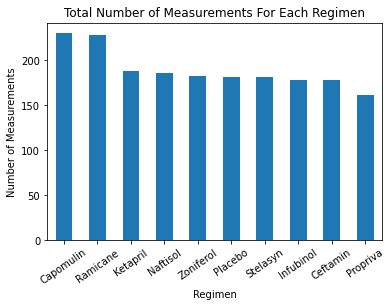

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Using value counts functions to look at the number of times a regimen appears in Drug Regimen column
total_measurements = combined_df["Drug Regimen"].value_counts()
total_measurements

# Using pandas to create bar plot with neccesary labels and title
total_measurements.plot.bar(xlabel="Regimen", ylabel="Number of Measurements", 
                            title="Total Number of Measurements For Each Regimen", rot=35)


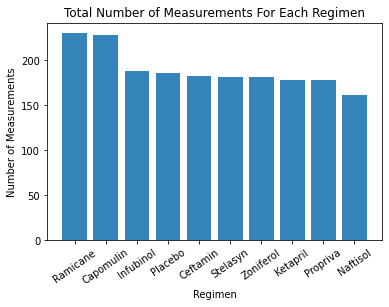

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Creating variables for x_axis and ticks
x_axis = np.arange(len(total_measurements))
ticks = combined_df["Drug Regimen"].unique()


# Using pyplot to create bar plot with neccesary labels and title
plt.bar(x_axis, total_measurements, align="center", alpha=.90)
plt.xticks(x_axis, ticks, rotation=35)
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements For Each Regimen")
plt.show()

<AxesSubplot:ylabel='Sex'>

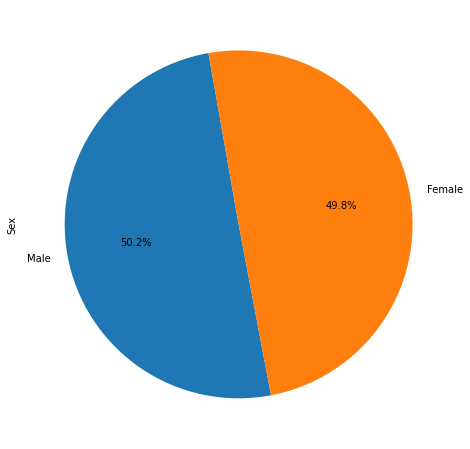

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Using value counts fucntion to count the number of times male or female appears. 
#Using cleaned data so not to take duplicates
sex_total = clean_df["Sex"].value_counts()
sex_total

#Using pandas to create pie plot with percentages
sex_total.plot.pie(figsize=(8,8), startangle=100, autopct="%1.1f%%")

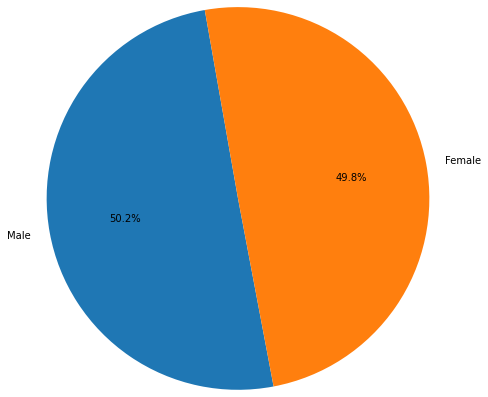

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Setting variable that will be used with pyplot to idetify the labels
labels = clean_df["Sex"].unique()

#Using pyplot to create pie plot with percentages
plt.pie(sex_total, startangle=100, explode=None, labels=labels, radius=2.2, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
selected_regimen_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")|
                  (clean_df["Drug Regimen"] == "Ramicane")|
                 (clean_df["Drug Regimen"] == "Infubinol")|
                 (clean_df["Drug Regimen"] == "Ceftamin")]
selected_regimen_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [22]:
# Using loc to find all the mice that were given Capomulin regimen. clean_df already looks at last Timepoint
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

# Setting variable to look at specifically the tumor volume column
capomulin_tumor_vol = capomulin_df["Tumor Volume (mm3)"]

# Setting quartiles
quartiles =capomulin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Printing data expressed in text
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# Calculating bounds to detemine what could be outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Printing bounds expressed in text
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [23]:
# Using loc to find all the mice that were given Ramicane regimen. clean_df already looks at last Timepoint
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
ramicane_df.head()

# Setting variable to look at specifically the tumor volume column
ramicane_tumor_vol = ramicane_df["Tumor Volume (mm3)"]

# Setting quartiles
quartiles =ramicane_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Printing data expressed in text
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

# Calculating bounds to detemine what could be outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Printing bounds expressed in text
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 31.56046955
The upper quartile of Capomulin tumors: 40.65900627
The interquartile range of Capomulin tumors: 9.098536719999998
The median of Capomulin tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [24]:
# Using loc to find all the mice that were given Infubinol regimen. clean_df already looks at last Timepoint
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
infubinol_df.head()

# Setting variable to look at specifically the tumor volume column
infubinol_tumor_vol = infubinol_df["Tumor Volume (mm3)"]

# Setting quartiles
quartiles =infubinol_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Printing data expressed in text
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

# Calculating bounds to detemine what could be outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Printing bounds expressed in text
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 54.04860769
The upper quartile of Capomulin tumors: 65.52574285
The interquartile range of Capomulin tumors: 11.477135160000003
The median of Capomulin tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [25]:
# Using loc to find all the mice that were given Ceftamin regimen. clean_df already looks at last Timepoint
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
ceftamin_df.head()

# Setting variable to look at specifically the tumor volume column
ceftamin_tumor_vol = ceftamin_df["Tumor Volume (mm3)"]

# Setting quartiles
quartiles =ceftamin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Printing data expressed in text
print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

# Calculating bounds to detemine what could be outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Printing bounds expressed in text
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 48.72207785
The upper quartile of Capomulin tumors: 64.29983003
The interquartile range of Capomulin tumors: 15.577752179999997
The median of Capomulin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


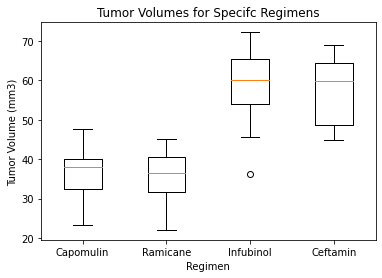

In [33]:
# Creating variables using lists for tumor volume and the specifc regimens
tumor_info = [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating the box plot with the neccesary labels and title
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_info, labels=regimen)
ax1.set_title("Tumor Volumes for Specifc Regimens")
ax1.set_xlabel("Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.show()


In [44]:
### Calculate the final tumor volume of each mouse across four of the treatment regimens:  
### Capomulin, Ramicane, Infubinol, and Ceftamin


### Start by getting the last (greatest) timepoint for each mouse


### Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [14]:
### Put treatments into a list for for loop (and later for plot labels)


### Create empty list to fill with tumor vol data (for plotting)


### Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    ### Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    ### add subset 
    
    
    ### Determine outliers using upper and lower bounds
    

In [34]:
### Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#test_df = df.reset_index()



## Line and Scatter Plots

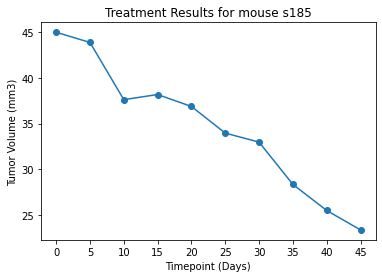

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Creating data frame for a specifc mouse using the original combine data frame
individual_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "s185"]

# Set x-axis to the Timepoints for the specific mouse
x_axis = individual_mouse_df["Timepoint"]

# Set variable that will be used for y-axis that represents the tumor volume for the coresponding Timepoint
tumor_size = individual_mouse_df["Tumor Volume (mm3)"]

# Creating line plot with neccesary ticks, labels, and titles
plt.plot(x_axis, tumor_size, marker="o")
plt.title("Treatment Results for mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(individual_mouse_df["Timepoint"])
plt.show()

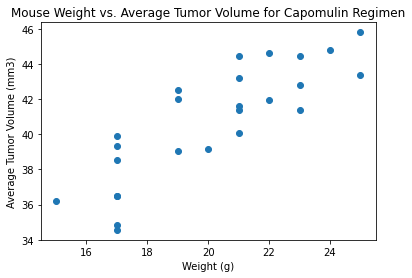

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Creating a specifc data frame for Capomulin regimen based on original combined data frame
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

# Creating variable to hold data that is now grouped by the Mouse ID
grouped_mouseID = capomulin_df.groupby("Mouse ID").mean()

# Create scatterplot with neccesary labels and titles
plt.scatter(grouped_mouseID["Weight (g)"], grouped_mouseID["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Using Pearson R fucntion to find the R value to represent the correlation
correlation = st.pearsonr(grouped_mouseID["Weight (g)"], grouped_mouseID["Tumor Volume (mm3)"])

# Printing out sentence to express R value and correlation
print(f"The correlation between mouse weight and the average tumor volume with the Capomulin Regimen is {round(correlation[0], 2)}.")

The correlation between mouse weight and the average tumor volume with the Capomulin Regimen is 0.84.


In [40]:
# Using scipy.stats to calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(grouped_mouseID["Weight (g)"], grouped_mouseID["Tumor Volume (mm3)"])

# Printing out sentence to express R squared value and linear regression
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.7088568047708717


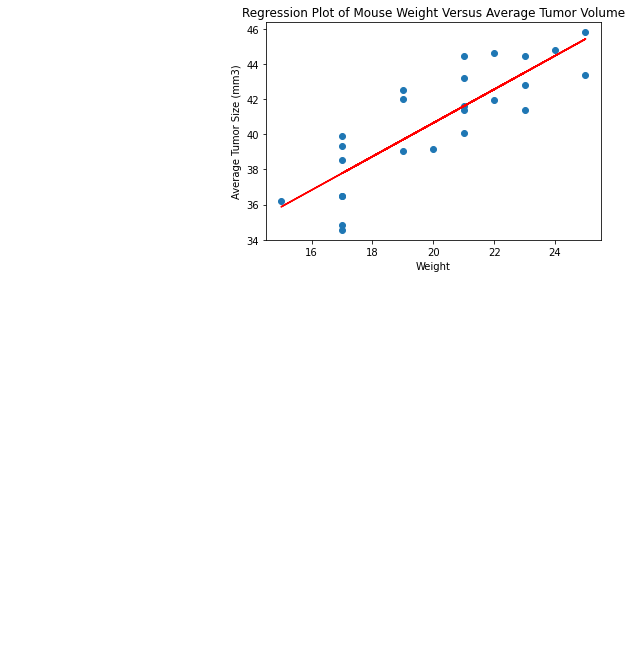

In [47]:
# Recreating new scatter plot with linear regression 
x_values = grouped_mouseID["Weight (g)"]
y_values = grouped_mouseID["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.title("Regression Plot of Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Size (mm3)")
plt.show()